In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DATA_PATH = r"C:\Users\User\Downloads\Citibike-Weather-Dashboard\Data\Processed\citibike_weather_merged_2022.csv"

df = pd.read_csv(DATA_PATH, parse_dates=["date"])
df = df.sort_values("date")

df.head(), df.columns

(        date  daily_trips  temp_avg_c
 0 2022-01-01          592         NaN
 1 2022-01-02         1248         NaN
 2 2022-01-03          832         NaN
 3 2022-01-04          934         NaN
 4 2022-01-05          914         NaN,
 Index(['date', 'daily_trips', 'temp_avg_c'], dtype='object'))

In [4]:
df["date"].min(), df["date"].max(), df["temp_avg_c"].isna().sum()

(Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-12-31 00:00:00'),
 np.int64(365))

In [6]:
df = df.drop(columns=["temp_max_c", "temp_min_c"], errors="ignore")
df.head()

,date,daily_trips,temp_avg_c
0,2022-01-01,592,NaN
1,2022-01-02,1248,NaN
2,2022-01-03,832,NaN
3,2022-01-04,934,NaN
4,2022-01-05,914,NaN


In [8]:
import pandas as pd

weather = pd.read_csv(
    r"C:\Users\User\Downloads\Citibike-Weather-Dashboard\Data\Processed\citibike_weather_daily_2022.csv",
    parse_dates=["date"]
)

weather = weather[["date", "temp_avg_c"]]
weather.head(), weather["temp_avg_c"].isna().sum()

(        date  temp_avg_c
 0 2022-01-01        11.6
 1 2022-01-02        11.4
 2 2022-01-03         1.4
 3 2022-01-04        -2.7
 4 2022-01-05         3.2,
 np.int64(0))

In [10]:
trips = pd.read_csv(
    r"C:\Users\User\Downloads\Citibike-Weather-Dashboard\Data\Processed\daily_trips_2022.csv",
    parse_dates=["date"]
)

trips.head()

,date,daily_trips
0,2022-01-01,592
1,2022-01-02,1248
2,2022-01-03,832
3,2022-01-04,934
4,2022-01-05,914


In [11]:
final_df = trips.merge(weather, on="date", how="inner")

final_df.head(), final_df["temp_avg_c"].isna().sum()

(        date  daily_trips  temp_avg_c
 0 2022-01-01          592        11.6
 1 2022-01-02         1248        11.4
 2 2022-01-03          832         1.4
 3 2022-01-04          934        -2.7
 4 2022-01-05          914         3.2,
 np.int64(0))

In [14]:
final_df.to_csv(
    r"C:\Users\User\Downloads\Citibike-Weather-Dashboard\Data\Processed\citibike_weather_merged_2022.csv",
    index=False
)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    r"C:\Users\User\Downloads\Citibike-Weather-Dashboard\Data\Processed\citibike_weather_merged_2022.csv",
    parse_dates=["date"]
)

df["date"].min(), df["date"].max(), df["temp_avg_c"].isna().sum()

(Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-12-31 00:00:00'),
 np.int64(0))

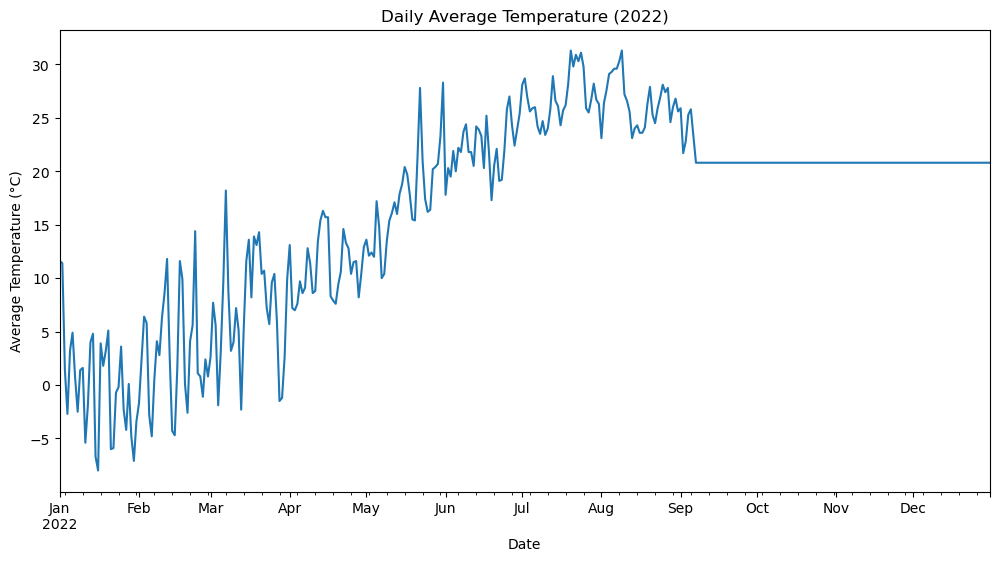

In [17]:
df.plot(
    x="date",
    y="temp_avg_c",
    figsize=(12, 6),
    title="Daily Average Temperature (2022)",
    legend=False
)

plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.show()

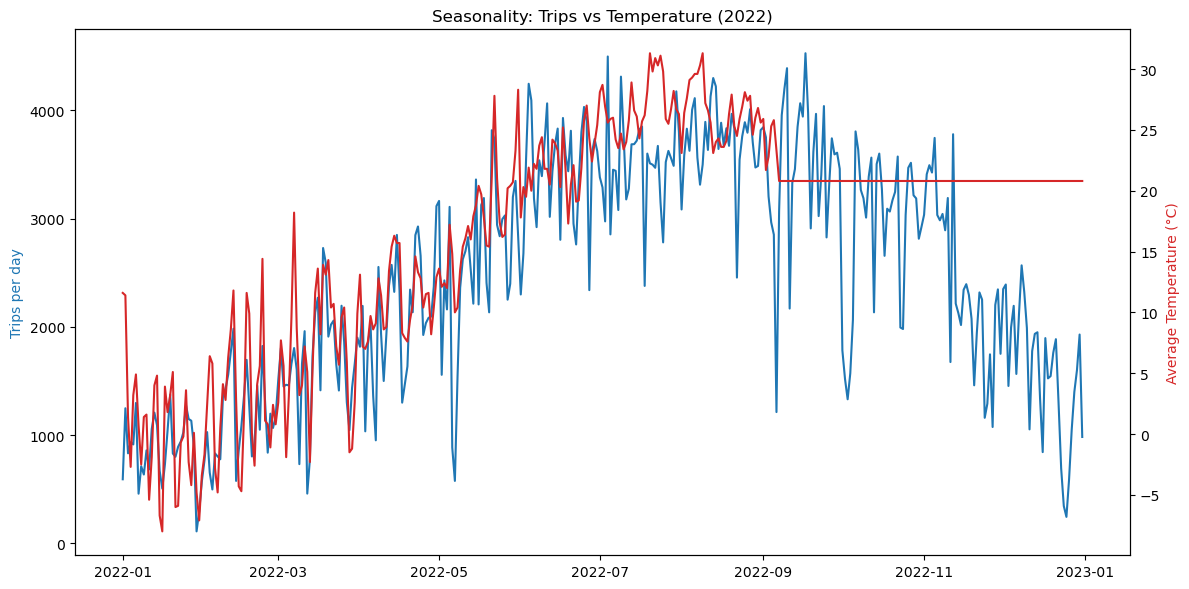

In [18]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df["date"], df["daily_trips"], color="tab:blue")
ax1.set_ylabel("Trips per day", color="tab:blue")

ax2 = ax1.twinx()
ax2.plot(df["date"], df["temp_avg_c"], color="tab:red")
ax2.set_ylabel("Average Temperature (°C)", color="tab:red")

plt.title("Seasonality: Trips vs Temperature (2022)")
plt.tight_layout()
plt.show()

### Dual-Axis Line Plot Explanation

This visualization compares daily Citi Bike trip counts with average daily temperature across 2022. 
The temperature time series was first plotted using pandas’ built-in plotting functionality, which 
leverages Matplotlib internally. For the seasonality comparison, Matplotlib’s object-oriented 
interface was used to create a figure with two y-axes via the `twinx()` method, allowing both 
variables to share a common time axis while maintaining independent scales. This approach provides 
clear visual separation of metrics with different units while preserving temporal alignment.
